In [72]:
import pandas as pd
import numpy as np

#1. 공공보건의료기관 현황 데이터 준비하기
data=pd.read_csv('./공공보건 의료기관 현황.csv', index_col=0, encoding='cp949', engine='python')
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [73]:
# 2. 주소 정리하기
addr=pd.DataFrame(data['주소'].apply(lambda v:v.split()[0:2]).tolist(),columns=('시도','구군'))
addr.head()

,시도,구군
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [74]:
#3. 주소 체계에 맞지 않게 표현된 내용 찾아서 수정
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [75]:
addr[addr['시도']=='창원시']

,시도,구군
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [76]:
addr.iloc[27]=['경상남도', '창원시']
addr.iloc[31]=['경상남도', '창원시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경산시', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '천안시', '충청북도'], dtype=object)

In [77]:
addr[addr['시도']=='경산시']

,시도,구군
47,경산시,경안로


In [78]:
addr.iloc[47]=['경상북도', '경산시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '천안시', '충청북도'], dtype=object)

In [79]:
addr[addr['시도']=='천안시']

,시도,구군
209,천안시,동남구
210,천안시,동남구


In [80]:
addr.iloc[209]=['충청남도', '천안시']
addr.iloc[210]=['충청남도', '천안시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [81]:
# 3-1 '시도'열 수정
addr_aliases = {'경기':'경기도','경남':'경상남도', '경북':'경상북도',
'충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', 
'대전시':'대전광역시', '충남':'충청남도','전남':'전라남도', '전북':'전라북도'}
addr['시도'] = addr['시도'].apply(lambda s: addr_aliases.get(s, s))
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [82]:
# 3-2 '구군'열 수정
addr['구군'].unique()
addr[addr['구군']=='아란13길']
addr.iloc[75]=['제주특별자치도','제주시']

In [83]:
# 4. 행정구역별 공공보건의료기관의 수 구하기
# 4-1 칼럼 합치기
addr['시도구군']=addr.apply(lambda r:r['시도'] + ' ' + r['구군'],axis=1)
addr.head()

,시도,구군,시도구군
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [84]:
addr['count']=0
addr_group=addr.groupby(['시도', '구군', '시도구군'], as_index=False).count()
addr_group.head()

,시도,구군,시도구군,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [85]:
# 4-2 index를 '시도구군'으로 변경
addr_group=addr_group.set_index('시도구군')
addr_group.head()

,시도,구군,count
시도구군,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [86]:
# 5. 행정구역별 인구수 데이터 준비하기
population=pd.read_excel('./인구수.xlsx')
population.head()

,행정구역(시군구)별,행정구역(시군구)별.1,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51408155,25617485,25790670
1,서울특별시,소계,9422710,4563512,4859198
2,서울특별시,종로구,140891,68079,72812
3,서울특별시,중구,121250,58806,62444
4,서울특별시,용산구,217611,104580,113031


In [87]:
population=population.rename(columns={'행정구역(시군구)별':'시도',
                                      '행정구역(시군구)별.1':'구군'})
population.head()

,시도,구군,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51408155,25617485,25790670
1,서울특별시,소계,9422710,4563512,4859198
2,서울특별시,종로구,140891,68079,72812
3,서울특별시,중구,121250,58806,62444
4,서울특별시,용산구,217611,104580,113031


In [90]:
# 5-1 데이터 정리하기
for element in range(0, len(population)):
    population['시도'][element]=population['시도'][element].strip()
    population['구군'][element]=population['구군'][element].strip()
    
population['시도구군']=population.apply(lambda r:r['시도']+' '+r['구군'],axis=1) 
#시도+군구=시도군구 열 생성
population=population[population.구군 != '소계']
population=population.set_index('시도구군')
population.head()

C:\Users\kim00\AppData\Local\Temp\ipykernel_29444\991539099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['시도'][element]=population['시도'][element].strip()
C:\Users\kim00\AppData\Local\Temp\ipykernel_29444\991539099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['구군'][element]=population['구군'][element].strip()


,시도,구군,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도구군,,,,,
서울특별시 종로구,서울특별시,종로구,140891,68079,72812
서울특별시 중구,서울특별시,중구,121250,58806,62444
서울특별시 용산구,서울특별시,용산구,217611,104580,113031
서울특별시 성동구,서울특별시,성동구,279980,136059,143921
서울특별시 광진구,서울특별시,광진구,336558,162071,174487


In [93]:
# addr_group과 population 병합
addr_population_merge = pd.merge(addr_group, population, left_index=True, right_index=True)
addr_population_merge.head()

,시도_x,구군_x,count,시도_y,구군_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도구군,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210630,104403,106227
강원도 동해시,강원도,동해시,1,강원도,동해시,89150,45303,43847
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63444,32193,31251
강원도 속초시,강원도,속초시,1,강원도,속초시,82499,40867,41632
강원도 양구군,강원도,양구군,1,강원도,양구군,21348,11218,10130


In [94]:
local_population=addr_population_merge[['시도_x', '구군_x', 'count', '총인구수 (명)']]
local_population.head()

,시도_x,구군_x,count,총인구수 (명)
시도구군,,,,
강원도 강릉시,강원도,강릉시,4,210630
강원도 동해시,강원도,동해시,1,89150
강원도 삼척시,강원도,삼척시,1,63444
강원도 속초시,강원도,속초시,1,82499
강원도 양구군,강원도,양구군,1,21348


In [96]:
local_population = local_population.rename(columns = {'시도_x':'시도', '군구_x': '군구',
'총인구수 (명)': '인구수'}) 
count = local_population['count']
local_population['ratio'] = count.div(local_population['인구수'], axis = 0)*10000

local_population.head()

,시도,구군_x,count,인구수,ratio
시도구군,,,,,
강원도 강릉시,강원도,강릉시,4,210630,0.189906
강원도 동해시,강원도,동해시,1,89150,0.112170
강원도 삼척시,강원도,삼척시,1,63444,0.157619
강원도 속초시,강원도,속초시,1,82499,0.121214
강원도 양구군,강원도,양구군,1,21348,0.468428


In [101]:
# 6. 분석 모델 구축 및 시각화
# 6-1 행정구역별 공공보건의료기관 수에 대한 바 차트 그리기
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

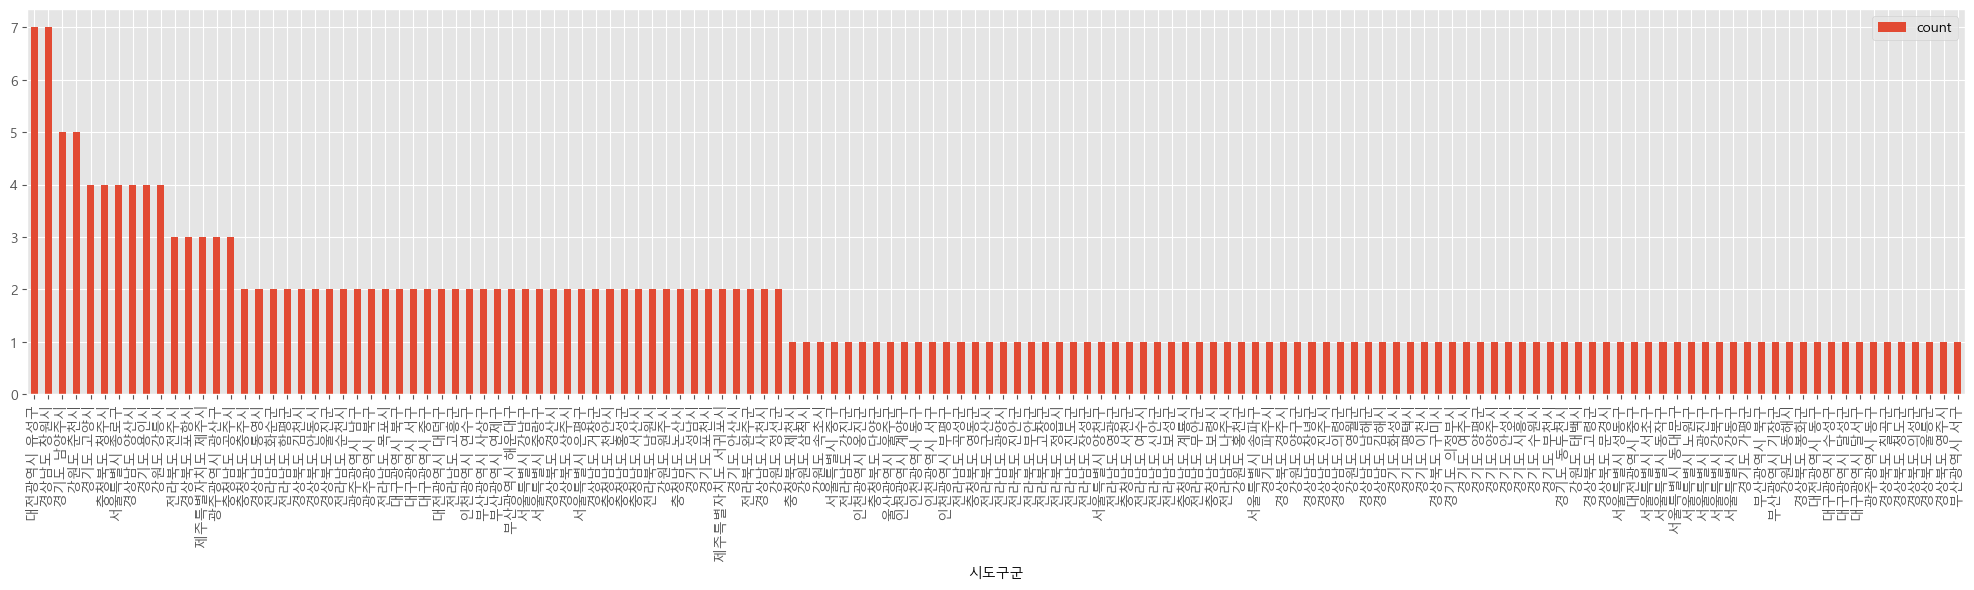

In [102]:
MC_count = local_population[['count']]
MC_count = MC_count.sort_values('count', ascending = False)
plt.rcParams['figure.figsize']=(25, 5)
MC_count.plot(kind='bar', rot=90)
plt.show()

In [103]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

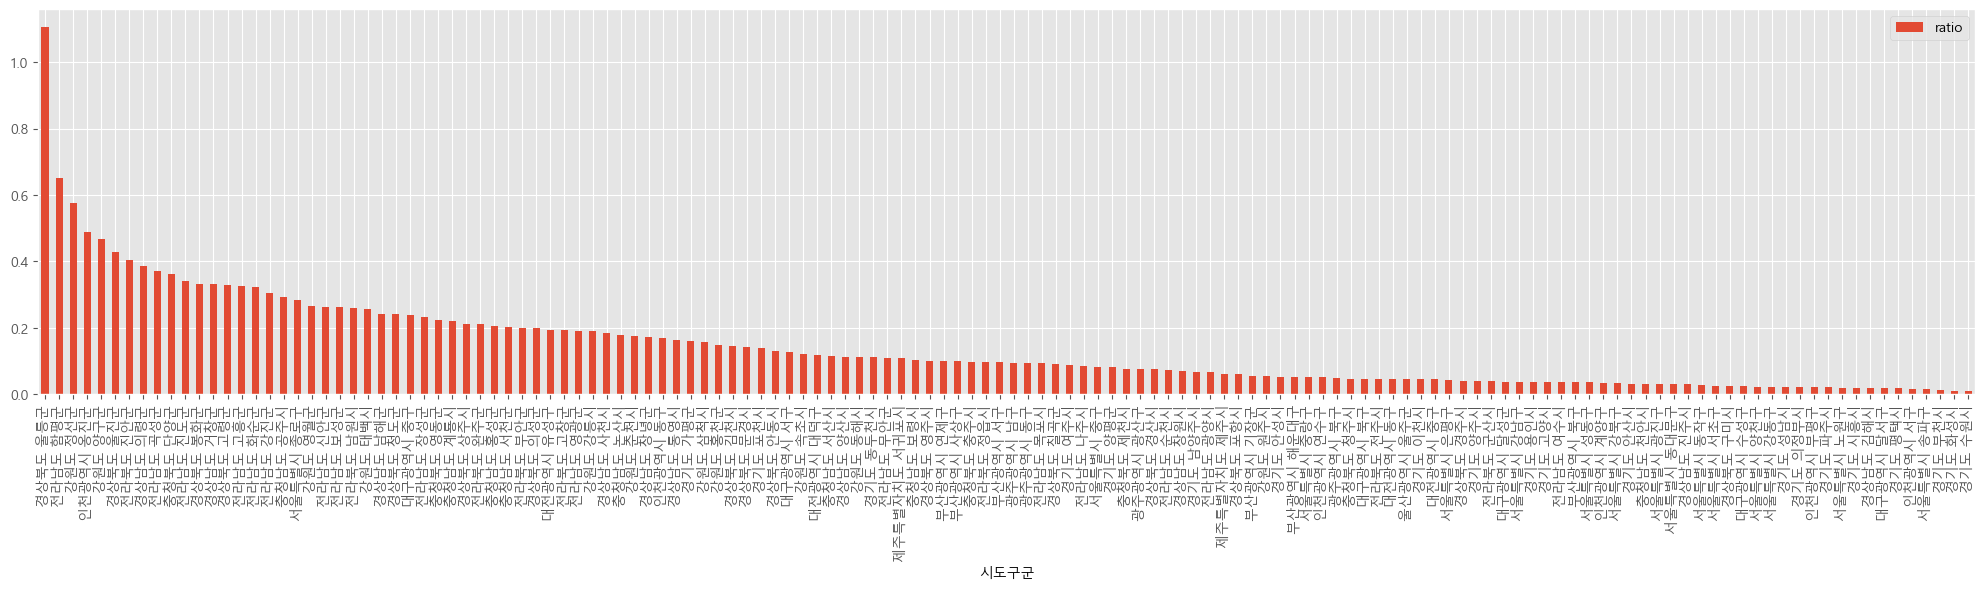

In [104]:
MC_count = local_population[['ratio']]
MC_count = MC_count.sort_values('ratio', ascending = False)
plt.rcParams['figure.figsize']=(25, 5)
MC_count.plot(kind='bar', rot=90)
plt.show()